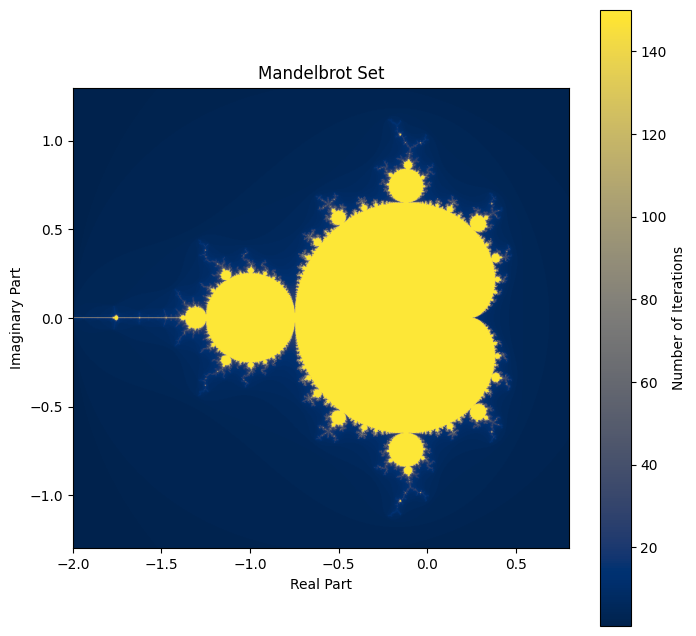

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
EXERCISE 1
'''
# Define parameters
w, h = 1000, 1000 # Image size
x_min, x_max = -2.0, 0.8  # Range real part
y_min, y_max = -1.3, 1.3  # Range imaginary part
max_i = 150  # Maximum number of iterations

mandelbrot_set = np.zeros((h, w))

# Generate Mandelbrot set
for x in range(w):
    real = x_min + ((x / w) * (x_max - x_min))
    for y in range(h):
        # Give coordinates to complex number
        imag = y_min + ((y / h) * (y_max - y_min))
        c = complex(real, imag)
 
        # Initialize z
        z = complex()
        iter = 0

        # Run iterations
        while abs(z) <= 2 and iter < max_i:
            z = (z * z) + c
            iter += 1

        # Insert corresponding number of iterations in matrix
        mandelbrot_set[y, x] = iter

# Print picture
plt.figure(figsize = (8, 8))
plt.imshow(mandelbrot_set, extent = (x_min, x_max, y_min, y_max), cmap = 'cividis')
plt.colorbar(label = 'Number of Iterations')
plt.title("Mandelbrot Set")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.show()

A_{M} ≅  1.5051399999999997


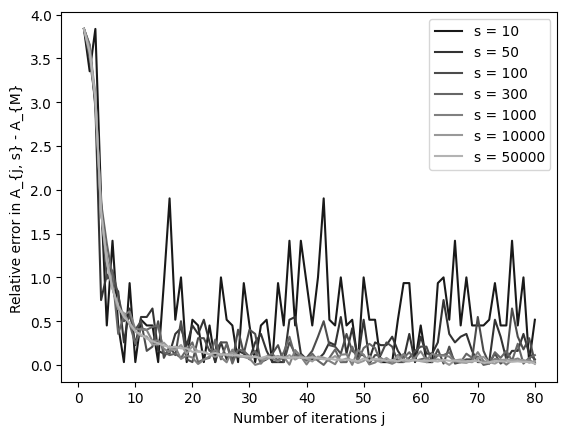

In [2]:
'''
EXERCISE 2
'''
def insidetheset(c, max_i): # Define function to determine if a given c is in the set (does not deviate for a given nuumber of iterations)
    
    z = complex()
    
    for i in range(max_i):
        if abs(z) > 2:
            return False
        z = (z * z) + c

    return True

def area(x_min, x_max, y_min, y_max, s, i): # Define function to calculate area 

    total_area = (x_max - x_min) * (y_max - y_min)
    samples_in_area = 0

    for _ in range(s):
        real = np.random.uniform(x_min, x_max)
        imag = np.random.uniform(y_min, y_max)
        c = complex(real, imag)
        if insidetheset(c, i):
            samples_in_area += 1

     # Area is calculated based on percentage of samples that do not deviate
    set_area = total_area * (samples_in_area / s)
    return set_area


x_min, x_max = -2.0, 0.8  # Range real part
y_min, y_max = -1.3, 1.3  # Range imaginary part

# Calculate an estimate of A_{M}
A_M = area(x_min, x_max, y_min, y_max, 200000, 10000)
print('A_{M} ≅ ', A_M)

# Create lists of all i and s
steps = 80
list_i = [1]
list_s = [10, 50, 100, 300, 1000, 10000, 50000]

for step in range(1, steps):
    list_i.append(list_i[step - 1] + 1)

# Define dictionary to store the estimated areas for each i, for each s
dic_diff = {s: [] for s in list_s}

for i in list_i:
    for s in list_s:
        diff = abs(area(x_min, x_max, y_min, y_max, s, i) - A_M) / A_M
        dic_diff[s].append(diff)

# Plot the differences with A_{M} for every estimated area
for index, (s, diff) in enumerate(dic_diff.items()):
    plt.plot(list_i, diff, color = plt.cm.gray(0.1 + 0.6 * (index / (len(list_s) - 1))), label = f's = {s}')

plt.xlabel('Number of iterations j')
plt.ylabel('Relative error in A_{j, s} - A_{M}')
plt.legend()
plt.show()